In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
data = pd.read_csv("metadata_complexity.tsv", sep="\t", header=0, index_col=0)

In [3]:
data_for_boxplots = data.copy()
data_for_boxplots["brow_genre"] = data_for_boxplots["genre"]
low_brow = data[data.genre != "hlit"].copy()
low_brow["brow_genre"] = "low"
data_for_boxplots = pd.concat((data_for_boxplots, low_brow))

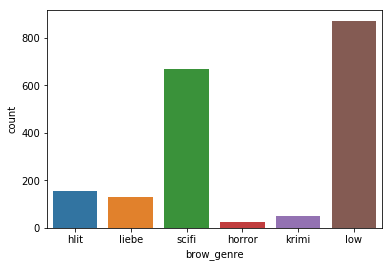

In [4]:
sns.countplot(x="brow_genre", data=data_for_boxplots)
plt.rcParams['figure.figsize'] = (12.0, 8.0)

## Dependency distance

Intuitively, larger values should indicate higher complexity.

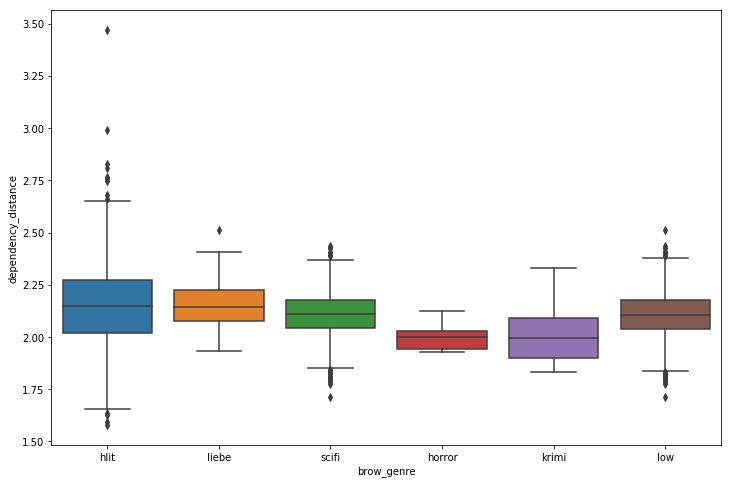

In [5]:
sns.boxplot(x="brow_genre", y="dependency_distance", data=data_for_boxplots)

## Closeness centrality

Intuitively, a lower value should indicate higher complexity (since we have longer paths).

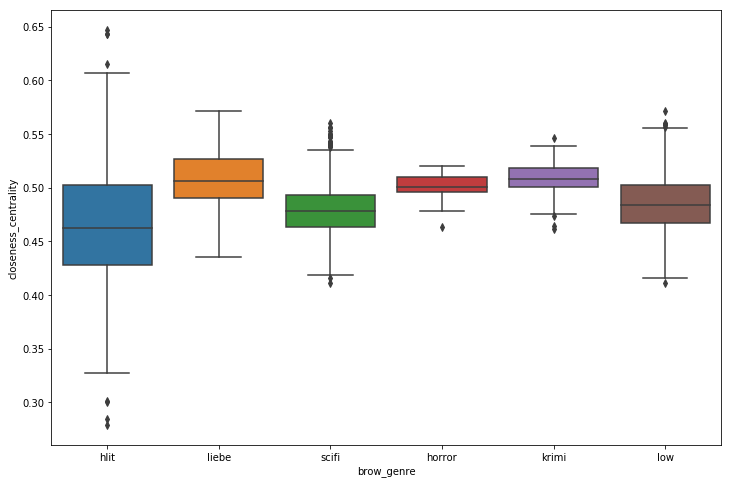

In [6]:
sns.boxplot(x="brow_genre", y="closeness_centrality", data=data_for_boxplots)

## Outdegree centralization

Intuitively, lower values should indicate higher complexity.

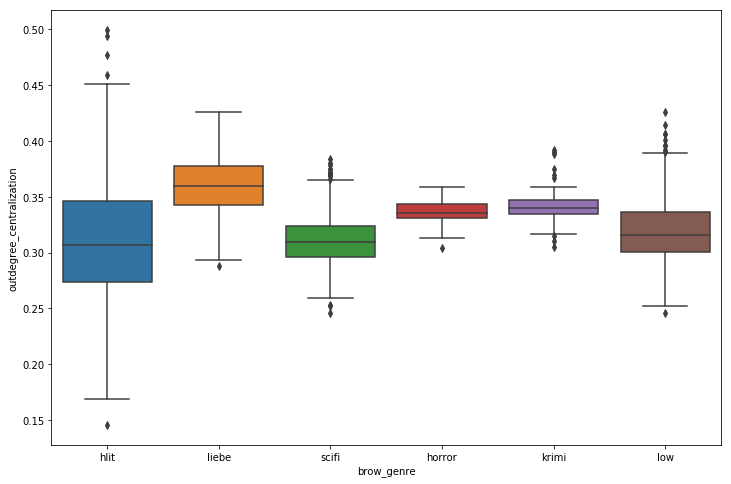

In [7]:
sns.boxplot(x="brow_genre", y="outdegree_centralization", data=data_for_boxplots)

## Closeness centralization

Intuitively, lower values should indicate higher complexity.

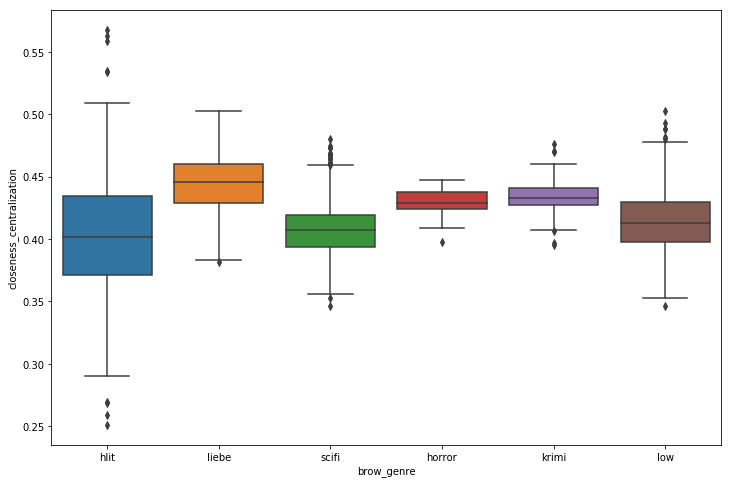

In [8]:
sns.boxplot(x="brow_genre", y="closeness_centralization", data=data_for_boxplots)

## Average sentence length

Higher values should indicate higher complexity.

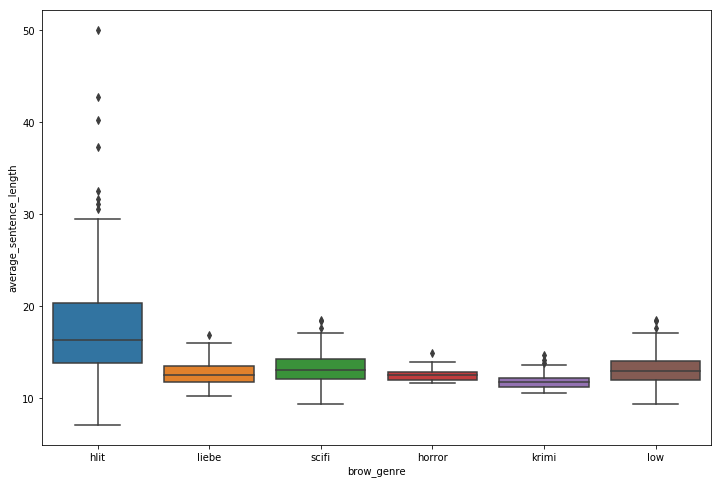

In [9]:
sns.boxplot(x="brow_genre", y="average_sentence_length", data=data_for_boxplots)

## Dependents per word

I'm not sure how to interpret these values in terms of syntactic complexity…

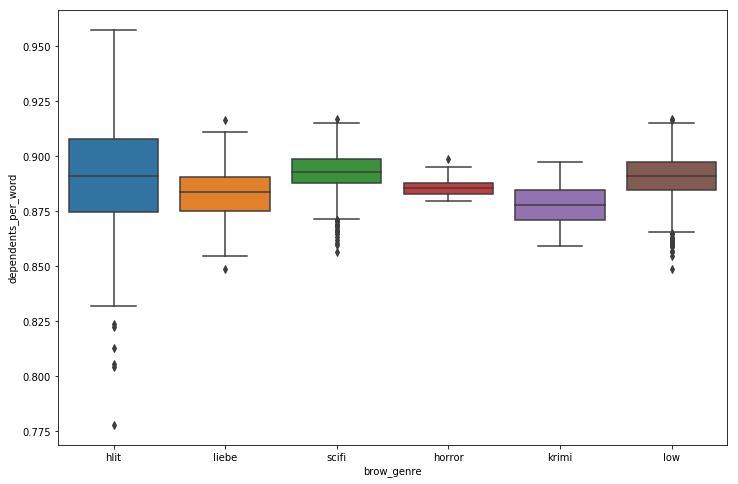

In [10]:
sns.boxplot(x="brow_genre", y="dependents_per_word", data=data_for_boxplots)

## Longest shortest path

Intuitively, larger values should indicate higher complexity.

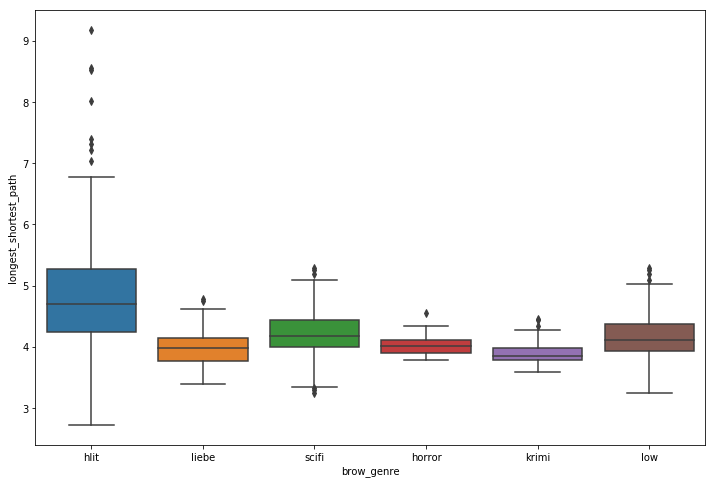

In [11]:
sns.boxplot(x="brow_genre", y="longest_shortest_path", data=data_for_boxplots)

## Punctuation per sentence

More punctuation marks should indicate more complex sentences.

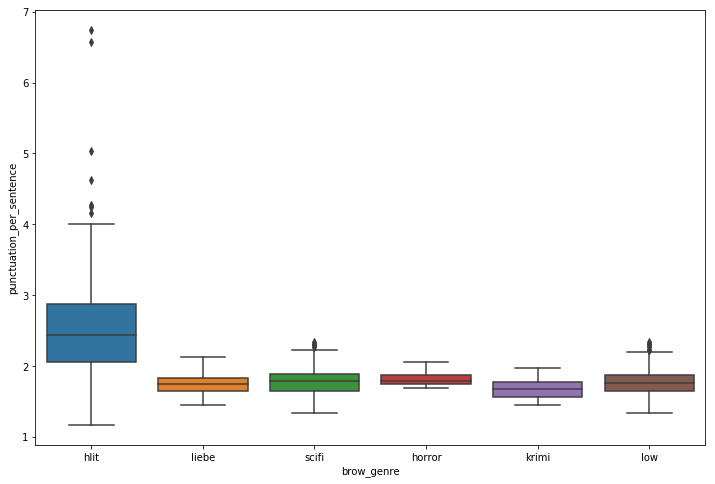

In [12]:
sns.boxplot(x="brow_genre", y="punctuation_per_sentence", data=data_for_boxplots)

## T-units ##

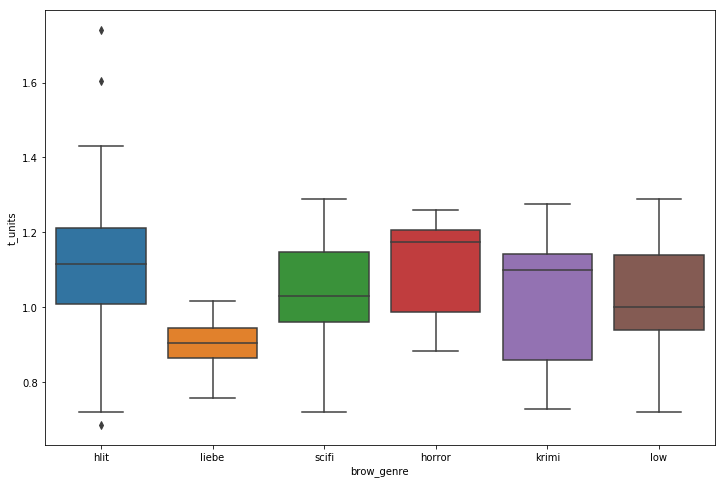

In [13]:
sns.boxplot(x="brow_genre", y="t_units", data=data_for_boxplots)

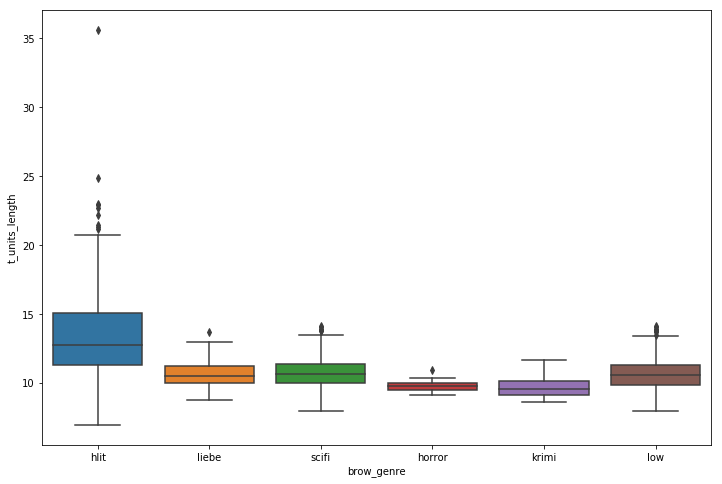

In [14]:
sns.boxplot(x="brow_genre", y="t_units_length", data=data_for_boxplots)

## Clauses ##

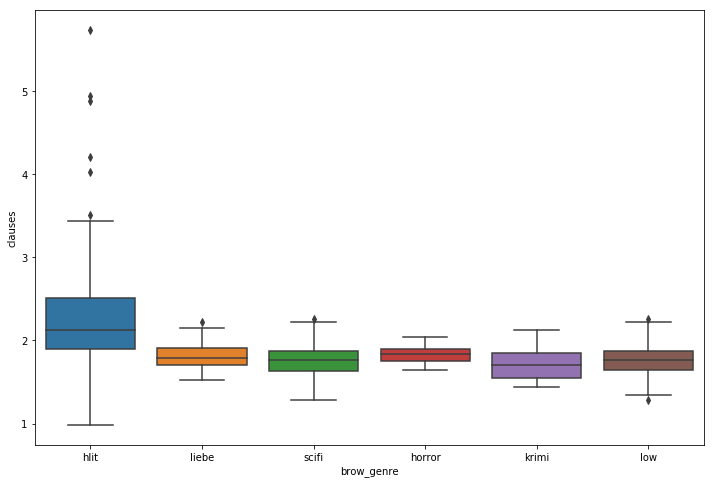

In [15]:
sns.boxplot(x="brow_genre", y="clauses", data=data_for_boxplots)

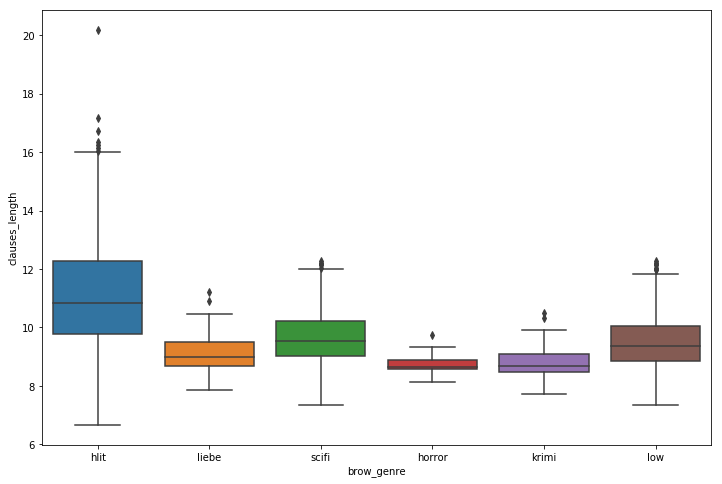

In [16]:
sns.boxplot(x="brow_genre", y="clauses_length", data=data_for_boxplots)

## NPs ##

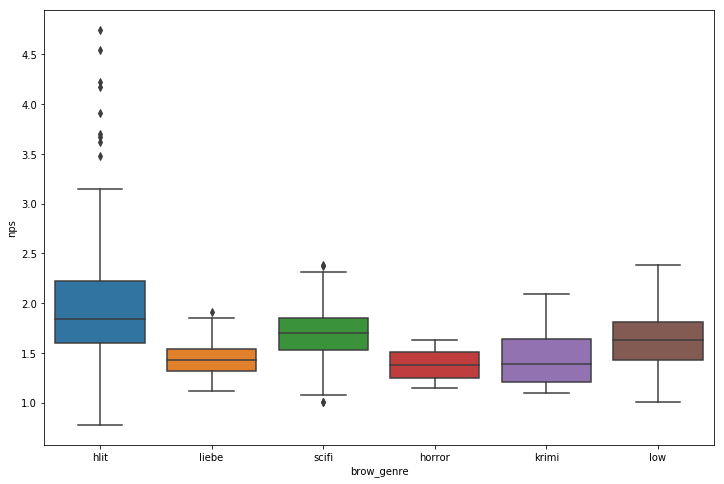

In [17]:
sns.boxplot(x="brow_genre", y="nps", data=data_for_boxplots)

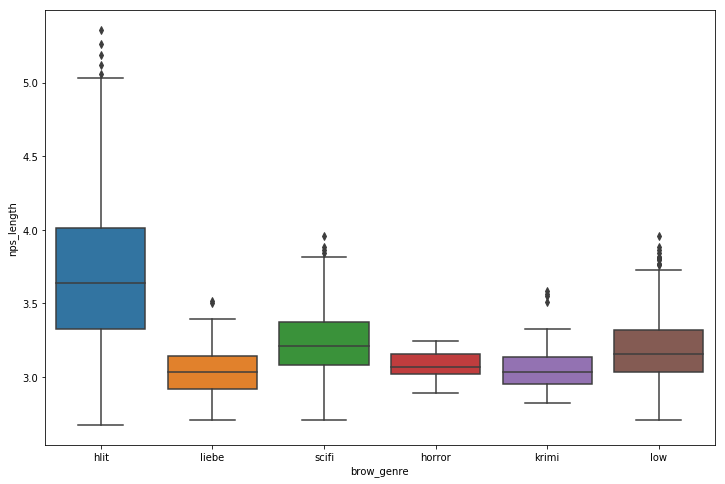

In [18]:
sns.boxplot(x="brow_genre", y="nps_length", data=data_for_boxplots)

## VPs ##

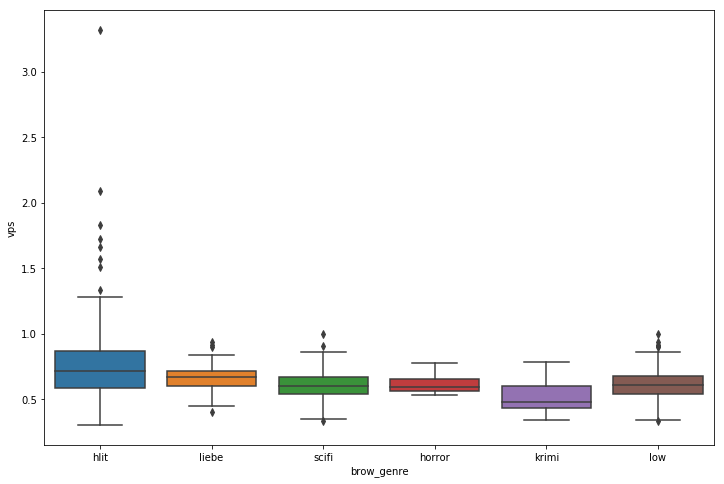

In [19]:
sns.boxplot(x="brow_genre", y="vps", data=data_for_boxplots)

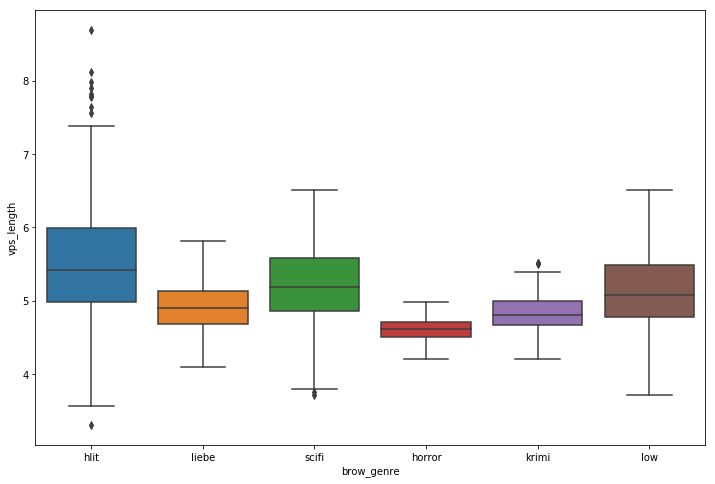

In [20]:
sns.boxplot(x="brow_genre", y="vps_length", data=data_for_boxplots)

## PPs ##

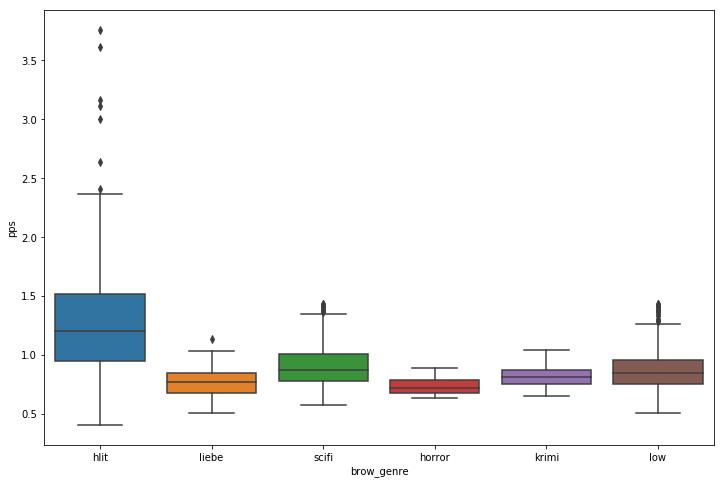

In [21]:
sns.boxplot(x="brow_genre", y="pps", data=data_for_boxplots)

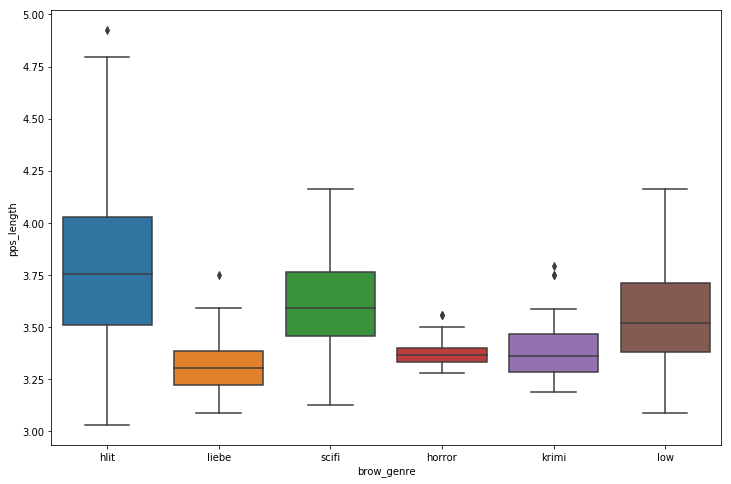

In [22]:
sns.boxplot(x="brow_genre", y="pps_length", data=data_for_boxplots)

## Constituents ##

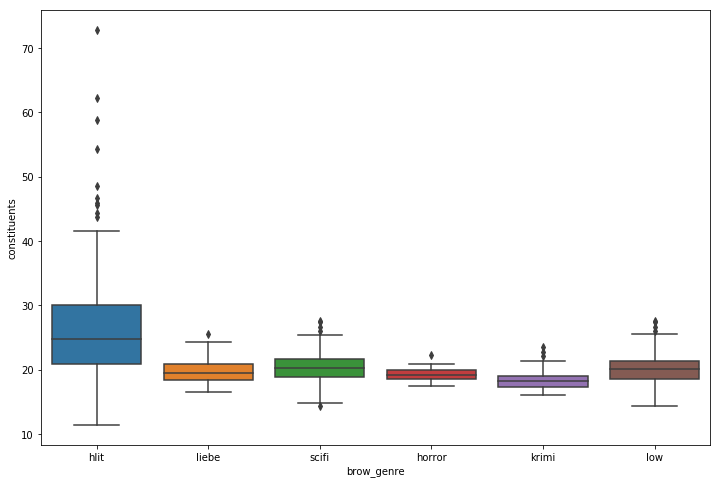

In [23]:
sns.boxplot(x="brow_genre", y="constituents", data=data_for_boxplots)

## Constituents without leaves ##

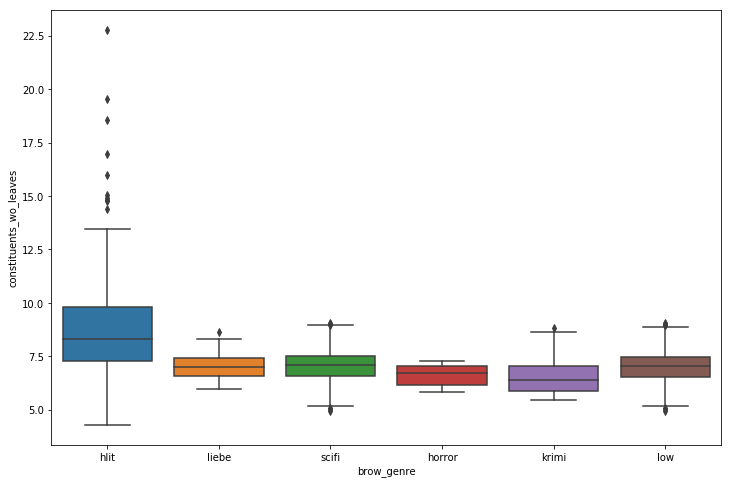

In [24]:
sns.boxplot(x="brow_genre", y="constituents_wo_leaves", data=data_for_boxplots)

## Height of parse tree ##

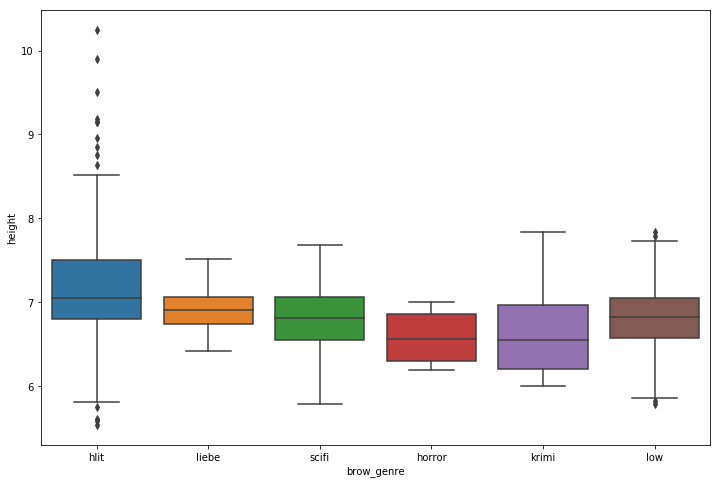

In [25]:
sns.boxplot(x="brow_genre", y="height", data=data_for_boxplots)

## Correlations

In [26]:
data_for_pairplot = data.copy()
data_for_pairplot.drop(columns=["filename", "dependency_distance_stdev", "closeness_centrality_stdev", "outdegree_centralization_stdev", "closeness_centralization_stdev", "average_sentence_length_stdev", "dependents_per_word_stdev", "longest_shortest_path_stdev", "punctuation_per_sentence_stdev", "t_units_stdev", "t_units_length_stdev", "clauses_stdev", "clauses_length_stdev", "nps_stdev", "nps_length_stdev", "vps_stdev", "vps_length_stdev", "pps_stdev", "pps_length_stdev", "constituents_stdev", "constituents_wo_leaves_stdev", "height_stdev"], inplace=True)

In [27]:
# default_palette = sns.color_palette()
# new_palette = [default_palette[0]] + default_palette[2:]
# sns.set_palette(new_palette)

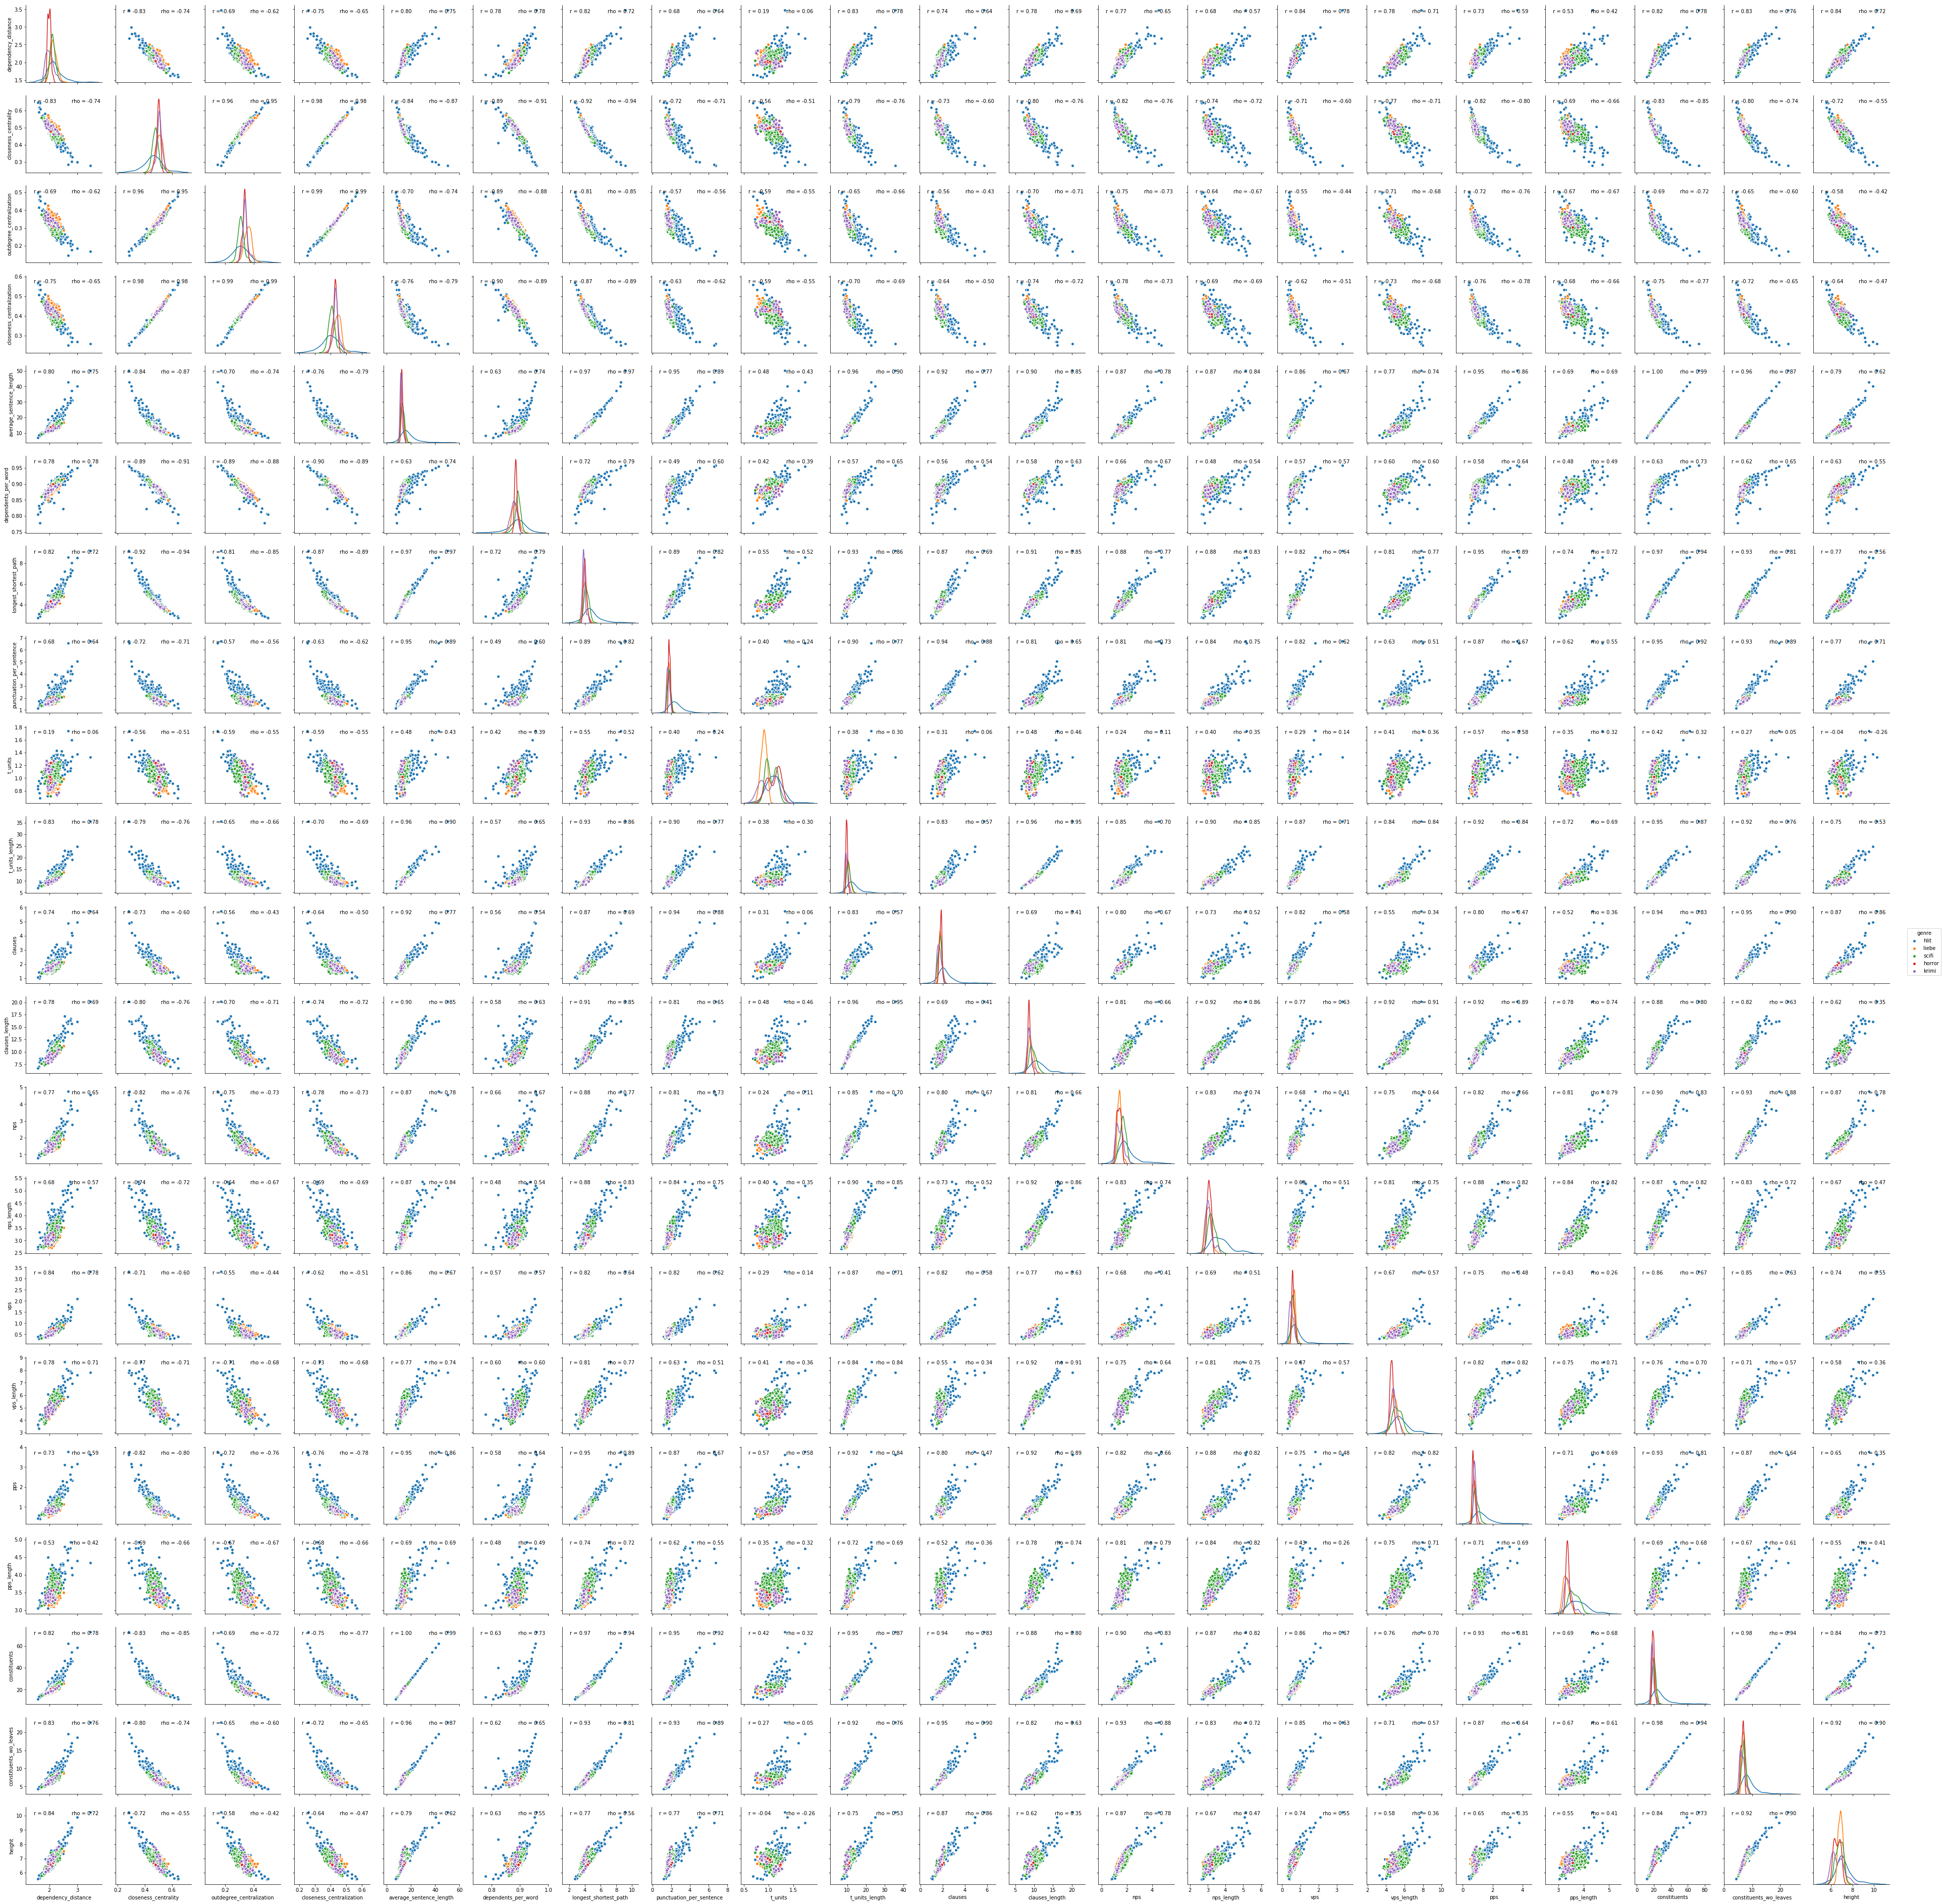

In [28]:
def corrfunc_factory(n_hues):
    n = 0
    xs, ys, current_ax = None, None, None
    def corrfunc(x, y, **kws):
        nonlocal n, xs, ys, current_ax
        n += 1
        ax = plt.gca()
        if n == 1:
            current_ax = ax
        assert ax == current_ax
        xs = pd.concat((xs, x))
        ys = pd.concat((ys, y))
        if n == n_hues:
            r, _ = scipy.stats.pearsonr(xs, ys)
            rho, _ = scipy.stats.spearmanr(xs, ys)
            ax.annotate("r = %.2f" % r, xy=(.1, .9), xycoords=ax.transAxes)
            ax.annotate("rho = %.2f" % rho, xy=(.6, .9), xycoords=ax.transAxes)
            xs, ys = None, None
            n = 0
    return corrfunc


corrfunc = corrfunc_factory(n_hues=5)
g = sns.pairplot(data_for_pairplot, hue="genre", diag_kind="kde")
g.map_offdiag(corrfunc)